### Solving the OneMax Problem with Parallel Hill Climbing Algorithm

In this project I code a population-based variant of basic Hill Climbing algorithm to solve a OneMax problem. Due to its simplicity, the OneMax problem is a useful baseline to test performance of algorithms in the AI field of Search and Optimisation. 

By finding a solution with ones only, e.g., "111111" we know that the algorithm found an optimal solution for the problem. 

In [1]:
# Libraries

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Custom functions for the algorithm

def generate_random_bitstring(length):
    """Generates a bitstring with random combination of 0s and 1s.
    
    Arguments:
    -----------
    length (int): number of bits in the generated bitstring

    Returns:
    -----------
    bitstring (np.array)    
    """

    return [random.randint(0,1) for _ in range(int(length))]


def bitflip_mutation(bitstring, p):
    """Perform mutation on a bitstring according to probability (p) of the mutation occuring.

    Arguments:
    ----------
    bitstring (np.array): a candidate solution to be mutated
    p (float): probability of mutation

    Returns:
    ----------
    mutated bitstring (np.array)
    """
    
    return [bit if random.random() >= p else 1-bit for bit in bitstring]  


def evaluate_fitness(bitstring):
    """Sum the number of ones in the bitstring.

    Arguments:
    ----------
    bitstring (np.array): a candidate solution for the OneMax problem

    Returns:
    ----------
    fitness score (int)
    """

    return sum(bitstring)


def parallel_hill_climbing(generations, L, population, p):
    """Use Parallel Hill Climbing algorithm to solve OneMax problem.

    Arguments:
    ---------
    generations (int): max number of generations for the search
    L (int): length of a bitstring for the OneMax problem (problem/solution size)
    population (int): number of solutions evolved in parallel
    p (float): probability of mutation

    Returns:
    ---------
    A triplet of the best bitstring (solution), its fitness score and a generation in which it was found 
    """

    # Start with the initial population of solutions and fitness values
    initial_population = [generate_random_bitstring(L) for solution in range(int(population))]
    
    # Store initial best solutions, their fitnesses and at which epoch they were found
    best_solutions = initial_population
    best_scores = [evaluate_fitness(solution) for solution in best_solutions]
    generation_converged = [0] * len(best_solutions)

    # Main Search: loop until no improvement is found:
    for generation in range(1, generations + 1):
        
        # perform mutation of the best_solutions so far
        mutated_solutions = [bitflip_mutation(solution, p=p) for solution in best_solutions]
    
        # obtain fitness value for the candidate solutions
        mutated_solutions_scores = [evaluate_fitness(solution) for solution in mutated_solutions]
    
        # accept the mutated_solutions if they have a better fitness value
        for i, (mutated, best) in enumerate(zip(mutated_solutions_scores, best_scores)):
            if mutated > best:
                best_solutions[i] = mutated_solutions[i] # replace the best solution
                best_scores[i] = mutated_solutions_scores[i] # replace the best solution fitness score

                # update the convergence tracker
                generation_converged[i] = generation

    # Choose the best solution from the population of solutions
    best_score_idx = np.argmax(best_scores)
                    
    return best_solutions[best_score_idx], best_scores[best_score_idx], generation_converged[best_score_idx]

#### Testing performance

I'm testing performance of the algorithm on different bitstring lengths (problem size):

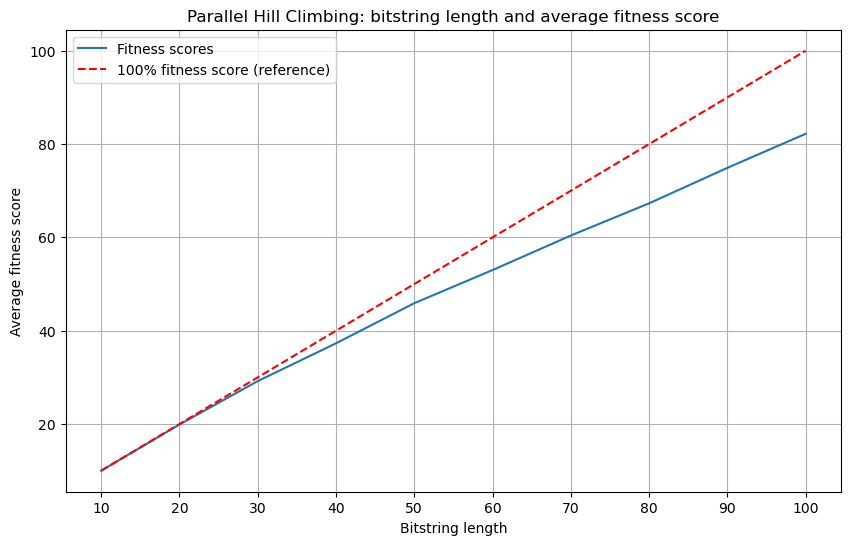

In [288]:
def test_parallel_hill_climber(population_size, runs=10):
    """Test performance of Parallel Hill Climbing algorithm on OneMax over repeated runs.
    Explore the algorithm's performance on varying lengths of the bitstring.

    Returns:
    ---------
    A tuple of average fitness score for each problem size and the number of generations 
    required to find the optimal solution
    """

    # test the algorithm on different bitstring lengths
    bitstring_lengths = np.linspace(10, 100, 10)

    avg_fitness_scores = []
    avg_convergence = []
    
    for L in bitstring_lengths:
    
        scores_per_length = []
        convergences_per_length = []
        
        # test the algorithm
        for _ in range(test_runs):
            _, test_score, test_convergence = parallel_hill_climbing(
                generations=100,
                L=L, 
                population=population_size, 
                p=0.05
            )
    
            # data for plotting
            scores_per_length.append(test_score)
            convergences_per_length.append(test_convergence)
    
        avg_fitness_scores.append(np.mean(scores_per_length))
        avg_convergence.append(np.mean(convergences_per_length))

    return avg_fitness_scores, avg_convergence


# generate data from test runs and plot
avg_fitness_scores, avg_convergence = test_parallel_hill_climber(10)


plt.figure(figsize=(10, 6))
sns.lineplot(x=np.linspace(10, 100, 10), y=avg_fitness_scores, label=f"Fitness scores")
sns.lineplot(x=np.linspace(10, 100, 10), y=np.linspace(10, 100, 10), label="100% fitness score (reference)",
             linestyle='--', color='red')
plt.title("Parallel Hill Climbing: bitstring length and average fitness score")
plt.xlabel("Bitstring length")
plt.ylabel("Average fitness score")
plt.xticks(np.linspace(10, 100, 10))
plt.legend()
plt.grid(True)
plt.show()

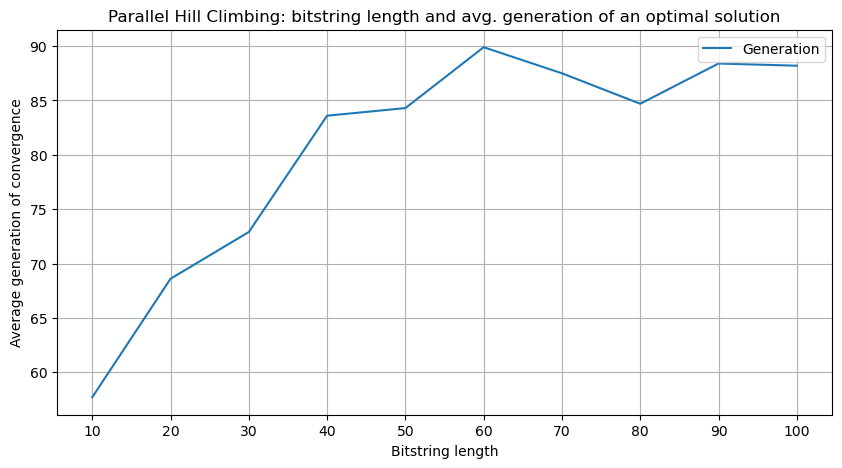

In [289]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=bitstring_lengths, y=avg_convergence, label="Generation")
plt.title("Parallel Hill Climbing: bitstring length and avg. generation of an optimal solution")
plt.xlabel("Bitstring length")
plt.ylabel("Average generation of convergence")
plt.xticks(bitstring_lengths)
plt.legend()
plt.grid(True)
plt.show()

**Observations**

When run with a population of 10 solutions and probability of mutation set to 0.05 (heuristic choice), the Parallel Hill Climbing algorithm easily finds optimal solutions for smaller problem sizes (10 to 30-bit-long bitstring). From around that point, the algorithm's performance gradually degrades, on average scoring approximately 80 for the bitstring with 100 bits. The second plot suggests gradually longer searches required for larger problem sizes.

In the second test, I explore the effect of different population sizes on the algorithm's performance.

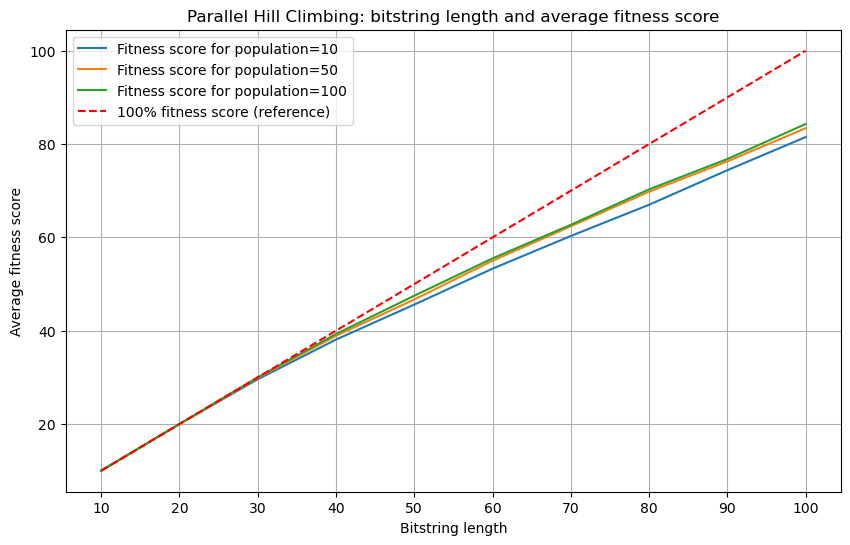

In [291]:
# generate data from test runs and plot
population_sizes = [10, 50, 100]

plt.figure(figsize=(10, 6))

for size in population_sizes:
    avg_fitness_scores, _ = test_parallel_hill_climber(population_size=size)
    sns.lineplot(x=np.linspace(10, 100, 10), y=avg_fitness_scores, label=f"Fitness score for population={size}")

sns.lineplot(x=np.linspace(10, 100, 10), y=np.linspace(10, 100, 10), label="100% fitness score (reference)",
             linestyle='--', color='red')
plt.title("Parallel Hill Climbing: bitstring length and average fitness score")
plt.xlabel("Bitstring length")
plt.ylabel("Average fitness score")
plt.xticks(np.linspace(10, 100, 10))
plt.legend()
plt.grid(True)
plt.show()

**Conclusion**

population size has only a limited influence over performance of the algorithm in the explored range of problem sizes. It is possible that exploring an adaptive schedule for mutation rate could improve average fitness score, e.g., dependent on diversity of population or time the algorithm runs. However, the overall tendency of degrading performance is quite clear, as observed from around 30-bit-long bitstrings. Other, more efficient algorithms would be appropriate, e.g., Genetic Algorithms. 